# ADPHC Assignment 1: Titanic Data Analysis

## 1. Introduction
This notebook demonstrates a Data Analytics project using tools from T2: seaborn, scipy, scikit-learn, dask, and pandas. We analyze the Titanic dataset (publicly available via seaborn), perform data cleaning, exploratory data analysis, grouping, statistical testing, and build a simple logistic regression model to predict survival.

Dataset source: https://github.com/mwaskom/seaborn-data (Titanic)

## 2. Setup and Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import dask.dataframe as dd

## 3. Data Loading

In [4]:
# Load Titanic dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 4. Data Cleaning Function

In [5]:
def clean_data(df):
    """Basic cleaning: fill age with median, drop rows missing embarked, drop duplicates."""
    df = df.copy()
    df['age'] = df['age'].fillna(df['age'].median())
    df = df.dropna(subset=['embarked'])
    df = df.drop_duplicates()
    return df

# Apply cleaning
df_clean = clean_data(df)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     779 non-null    int64   
 1   pclass       779 non-null    int64   
 2   sex          779 non-null    object  
 3   age          779 non-null    float64 
 4   sibsp        779 non-null    int64   
 5   parch        779 non-null    int64   
 6   fare         779 non-null    float64 
 7   embarked     779 non-null    object  
 8   class        779 non-null    category
 9   who          779 non-null    object  
 10  adult_male   779 non-null    bool    
 11  deck         200 non-null    category
 12  embark_town  779 non-null    object  
 13  alive        779 non-null    object  
 14  alone        779 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 76.6+ KB


## 5. Exploratory Data Analysis (Seaborn)

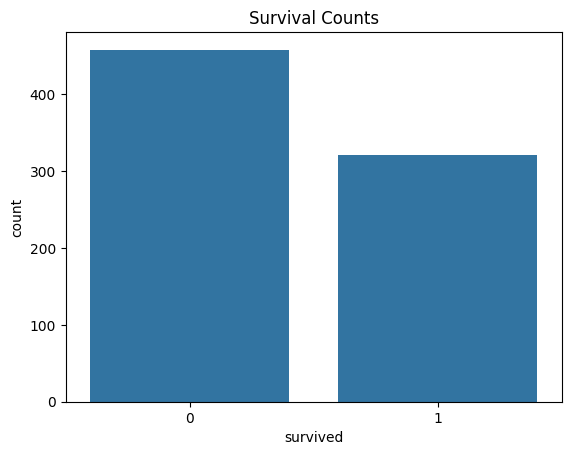

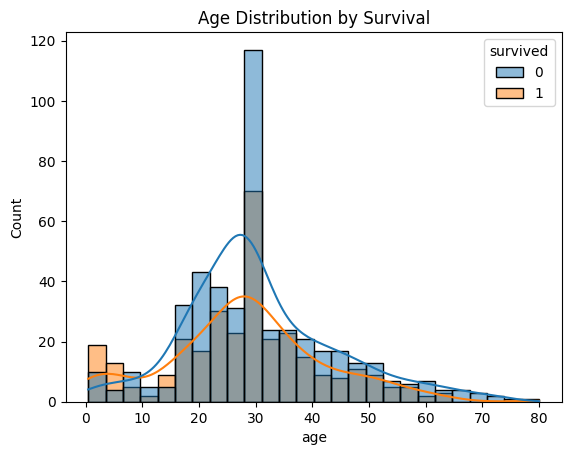

In [6]:
# Survival count
sns.countplot(x='survived', data=df_clean)
plt.title('Survival Counts')
plt.show()

# Age distribution by survival
sns.histplot(data=df_clean, x='age', hue='survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

## 6. GroupBy Analysis

In [7]:
# Survival rate by passenger class and sex
grouped = df_clean.groupby(['pclass', 'sex'])['survived'].mean().reset_index()
print(grouped)

   pclass     sex  survived
0       1  female  0.967033
1       1    male  0.371901
2       2  female  0.917808
3       2    male  0.184783
4       3  female  0.472441
5       3    male  0.160000


## 7. Statistical Testing with SciPy

In [8]:
# Chi-square test: survival vs class
contingency = pd.crosstab(df_clean['pclass'], df_clean['survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi2={chi2:.2f}, p-value={p:.4f}")

Chi2=86.00, p-value=0.0000


## 8. Machine Learning Model (scikit-learn)

In [9]:
# Feature selection
df_ml = df_clean[['survived', 'pclass', 'sex', 'age', 'fare']].copy()
df_ml['sex'] = df_ml['sex'].map({'male':0, 'female':1})

X = df_ml.drop('survived', axis=1)
y = df_ml['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.774
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       142
           1       0.74      0.65      0.69        92

    accuracy                           0.77       234
   macro avg       0.77      0.75      0.76       234
weighted avg       0.77      0.77      0.77       234



## 9. Dask Demonstration

In [10]:
# Convert to Dask DataFrame for demonstration
ddf = dd.from_pandas(df_clean, npartitions=3)
# Compute average fare by embark_town
dask_group = ddf.groupby('embark_town')['fare'].mean().compute()
print(dask_group)

embark_town
Cherbourg      63.710056
Queenstown     14.563490
Southampton    28.753642
Name: fare, dtype: float64


## 10. Conclusion
This minimal notebook covers data cleaning, EDA with seaborn, groupby analyses, statistical testing with SciPy, a simple logistic regression model using scikit-learn, and a demonstration of Dask for parallel data operations. Adjust and extend as needed for deeper analysis.